In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
file = "SQMStats_CS_Bottleneck_20190107-20203106_v2.csv"
data = pd.read_csv(file ,quotechar="'",engine="python",encoding="utf-8")

data.head()

Unnamed: 0         Cycle Id  Year [In]  Month [In]  Day [In]  Hour [In]  \
0       31106          2004413       2019           7         1          0   
1       31107          7476625       2019           7         1          0   
2       31108          6932465       2019           7         1          1   
3       31109          4939613       2019           7         1          1   
4       31110  7717503-7717505       2019           7         1          1   

   Year [Out]  Month [Out]  Day [Out]  Hour [Out]  ... Zone Name (98)  \
0        2019            7          1           0  ...            NaN   
1        2019            7          1           1  ...            NaN   
2        2019            7          1           1  ...            NaN   
3        2019            7          1           2  ...            NaN   
4        2019            7          1           2  ...            NaN   

  Zone Pre Time (98) Zone Start (98) Zone End (98) Zone Time (98)  \
0                NaN             NaN           NaN            NaN   
1                NaN             NaN           NaN            NaN   
2                NaN             NaN           NaN            NaN   
3                NaN             NaN           NaN            NaN   
4                NaN             NaN           NaN            NaN   

  Zone Name (99) Zone Pre Time (99) Zone Start (99)  Zone End (99)  \
0            NaN                NaN             NaN            NaN   
1            NaN                NaN             NaN            NaN   
2            NaN                NaN             NaN            NaN   
3            NaN                NaN             NaN            NaN   
4            NaN                NaN             NaN            NaN   

  Zone Time (99)  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 514 columns]

__conservar el ID, Origin, Destination, Product, ZO, Start Act, End Act, Pre Time.__

# Generador de Actividad.csv

In [38]:
from IPython.display import clear_output

lista_zonas= []
for x,j in data.iterrows():
    print(x)
    #print(j)
    ID = j[1]
    Origin = j[16]
    Destination = j[17]
    Product = j[15]
    pre_list = [ID,Origin,Destination,Product]
    #print(pre_list)
    j_2 = j[19:]
    for i in range(1,99):
            zone_1 = "Zone Name (%s)"%i
            zone_2 = "Zone Pre Time (%s)"%i
            zone_3 = "Zone Start (%s)"%i
            zone_4 = "Zone End (%s)"%i
            zone_5 = "Zone Time (%s)"%i
            if j_2[zone_1] != j_2[zone_1] :
                #print('nan')
                break
            else:
                aux = [j_2[zone_1],j_2[zone_2],j_2[zone_3],j_2[zone_4],j_2[zone_5]]
                row = pre_list+aux
                lista_zonas.append(row)
    clear_output(wait=True)    

ValueError: 8 columns passed, passed data had 9 columns

In [39]:
name_columns = ['ID','Origin','Destination','Product','ZO','Pre Time','Start Act','End Act','Total Time']
df_1 = pd.DataFrame(lista_zonas,columns=name_columns) 

In [41]:
df_1[df_1['ZO']=='C NPT3']

ID            Origin     Destination Product      ZO  Pre Time  \
1        7476625    Nueva Victoria        Coya Sur    SNIT  C NPT3     685.0   
3        6932465    Nueva Victoria        Coya Sur    SNIT  C NPT3    1687.0   
33       6805913          Coya Sur  Nueva Victoria     NaN  C NPT3     955.0   
43       5689375    Nueva Victoria        Coya Sur    SNIT  C NPT3     646.0   
45       7435177    Nueva Victoria        Coya Sur    SNIT  C NPT3    1443.0   
...          ...               ...             ...     ...     ...       ...   
278621  15722162         Baquedano        Coya Sur     NaN  C NPT3    4798.0   
278647  16166227  Salar de Atacama        Coya Sur     NaN  C NPT3    6685.0   
278655  15608207  Salar de Atacama        Coya Sur     NaN  C NPT3    6067.0   
278677  16352111    Nueva Victoria        Coya Sur     NaN  C NPT3     889.0   
278688  16334468    Nueva Victoria        Coya Sur     NaN  C NPT3     685.0   

                Start Act            End Act  Total Time  
1       20190701 01:10:25  20190701 01:15:25       300.0  
3       20190701 01:42:00  20190701 01:50:41       521.0  
33      20190701 04:55:52  20190701 05:02:53       421.0  
43      20190701 05:41:33  20190701 05:47:16       343.0  
45      20190701 05:56:57  20190701 06:01:57       300.0  
...                   ...                ...         ...  
278621  20200630 22:52:15  20200630 22:58:40       385.0  
278647  20200630 23:54:18  20200701 00:03:19       541.0  
278655  20200701 00:06:25  20200701 00:15:26       541.0  
278677  20200630 23:33:08  20200630 23:41:09       481.0  
278688  20200630 23:55:16  20200701 00:08:16       780.0  

[49098 rows x 9 columns]

In [42]:
df_1.to_csv('actividad_2019-2020_v1.csv')

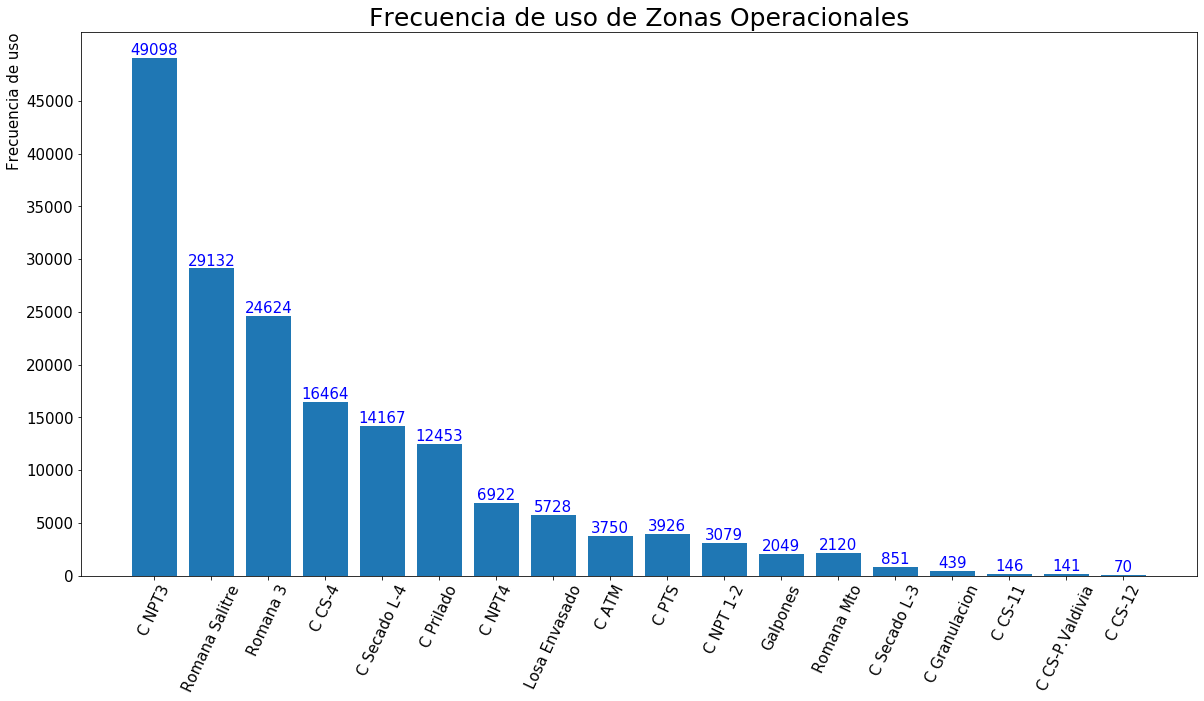

In [43]:
def frecuencia_uso(df,zonas):
    frecuencias_uso = []
    for zona in zonas:
        frecuencia = df[df['ZO']==zona].shape[0]
        frecuencias_uso.append(frecuencia)
    return frecuencias_uso

asd_1 = ['C NPT3' ,'Romana Salitre','Romana 3','C CS-4','C Secado L-4','C Prilado','C NPT4','Losa Envasado','C ATM','C PTS','C NPT 1-2','Galpones','Romana Mto','C Secado L-3','C Granulacion','C CS-11','C CS-P.Valdivia','C CS-12']
#asd_2 = [45554, 27292, 22766, 15832, 13393,11832,8129, 5275, 3448, 3345, 2934, 2013, 1840, 809,434,145,135, 67] 
asd_2 = frecuencia_uso(df_1,asd_1)

plt.figure(figsize=(20,10))
plt.bar(asd_1,asd_2)
plt.xticks(asd_1,rotation=65,fontsize=15)
plt.yticks(np.arange(0,50000,5000),fontsize=15)
plt.ylabel("Frecuencia de uso",fontsize=15,position=(1,1),ha='right')
plt.title("Frecuencia de uso de Zonas Operacionales",fontsize=25)
for index, value in enumerate(asd_2):
     plt.text(index,value,str(round(value,1)),fontsize=15,color='b',ha='center',va='bottom',position=(index,value+0.2))
#plt.savefig('./plot_finales/usos_zonas_operacionales.png')
plt.show()